In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as spo
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
name = 'AAPL ORCL F BAC HP INTC MSFT AMD SPY GM GOOGL NVDA BMW.DE DAL NRG V JNJ MA COKE FB MS GS YNDX OZON'

df = yf.download(name, period='5y', interval = "1d")
df = df.dropna()
df

[*********************100%***********************]  24 of 24 completed


Adj Close                                                \
                  AAPL         AMD        BAC     BMW.DE        COKE   
Date                                                                   
2020-11-25  115.319077   86.709999  28.305275  71.993309  264.531219   
2020-11-27  115.875641   87.190002  28.266273  69.787666  263.255096   
2020-11-30  118.320587   92.660004  27.456993  69.739929  260.902222   
2020-12-01  121.968094   92.629997  27.973763  71.401314  262.457520   
2020-12-02  122.325890   93.739998  28.334524  70.971649  257.502502   
...                ...         ...        ...        ...         ...   
2021-12-17  171.139999  137.750000  43.880001  86.919998  545.000000   
2021-12-20  169.750000  135.800003  43.160000  85.190002  590.869995   
2021-12-21  172.990005  144.250000  44.189999  87.089996  585.000000   
2021-12-22  175.639999  143.880005  44.279999  87.440002  600.710022   
2021-12-23  176.279999  146.139999  44.419998  89.169998  593.500000   

                                                                      ...  \
                  DAL          F          FB         GM        GOOGL  ...   
Date                                                                  ...   
2020-11-25  41.290001   9.034509  275.589996  45.459999  1764.130005  ...   
2020-11-27  41.060001   9.044459  277.809998  45.060001  1787.020020  ...   
2020-11-30  40.250000   9.034509  276.970001  43.840000  1754.400024  ...   
2020-12-01  39.959999   9.193707  286.549988  44.680000  1795.359985  ...   
2020-12-02  41.070000   9.153908  287.519989  44.580002  1824.969971  ...   
...               ...        ...         ...        ...          ...  ...   
2021-12-17  36.560001  19.770000  333.790009  55.160000  2834.500000  ...   
2021-12-20  36.369999  19.420000  325.450012  54.040001  2832.139893  ...   
2021-12-21  38.520000  19.610001  334.200012  54.790001  2869.449951  ...   
2021-12-22  39.130001  20.139999  330.450012  56.080002  2928.300049  ...   
2021-12-23  39.299999  20.250000  335.239990  56.910000  2938.330078  ...   

               Volume                                                 \
                   MA          MS        MSFT        NRG        NVDA   
Date                                                                   
2020-11-25  2535200.0  11509700.0  21012900.0  2483700.0  25991600.0   
2020-11-27  1402300.0   5581500.0  14512200.0  1419800.0  16727600.0   
2020-11-30  4276200.0  15610700.0  33064800.0  4917300.0  28695200.0   
2020-12-01  4210400.0  15857200.0  30904500.0  4304100.0  29694800.0   
2020-12-02  2972100.0  10790700.0  23724500.0  2151800.0  28336000.0   
...               ...         ...         ...        ...         ...   
2021-12-17  5898200.0  20851400.0  47750300.0  8279700.0  71375800.0   
2021-12-20  5013900.0  11931400.0  28326500.0  2391800.0  46184700.0   
2021-12-21  3105100.0   8235100.0  24740600.0  3055300.0  52438500.0   
2021-12-22  3456400.0   4798400.0  24831500.0  1593000.0  39518400.0   
2021-12-23  2588494.0   4264392.0  19232728.0  1425667.0  34116480.0   

                                                                       
                  ORCL       OZON          SPY           V       YNDX  
Date                                                                   
2020-11-25   6848900.0  3804900.0   45330900.0   6772900.0  1855600.0  
2020-11-27   5627000.0  1430400.0   28514100.0   3512900.0  1335600.0  
2020-11-30  26676900.0  2540500.0   83872700.0   7725500.0  3774500.0  
2020-12-01  11855300.0  1641400.0   74231400.0   8047900.0  2357500.0  
2020-12-02   9330400.0  1897900.0   45927000.0   9728900.0  1168200.0  
...                ...        ...          ...         ...        ...  
2021-12-17  28872300.0  1158800.0  135511600.0  11578400.0  1903600.0  
2021-12-20  17205400.0  1239000.0  107134800.0   9434400.0  1265100.0  
2021-12-21  15823000.0   760000.0   69806300.0   6993700.0  1481600.0  
2021-12-22  10539000.0   748700.0   58890200.0   600

In [3]:
df_close = pd.DataFrame({'Date': df.index.values})

for index in name.split(' '):
    df_close[index] = df['Adj Close'][index].values

In [4]:
df_close

,Date,AAPL,ORCL,F,BAC,HP,INTC,MSFT,AMD,SPY,...,NRG,V,JNJ,MA,COKE,FB,MS,GS,YNDX,OZON
0,2020-11-25,115.319077,56.538807,9.034509,28.305275,23.243587,45.860844,212.092178,86.709999,356.368011,...,31.212286,209.602478,140.148026,339.653900,264.531219,275.589996,62.000870,231.199036,65.620003,39.009998
1,2020-11-27,115.875641,56.883499,9.044459,28.266273,22.887032,46.250732,213.440857,87.190002,357.360535,...,31.463921,209.711792,140.460159,337.414886,263.255096,277.809998,62.352489,230.084747,67.190002,40.000000
2,2020-11-30,118.320587,56.844109,9.034509,27.456993,21.942642,47.127983,212.290543,92.660004,355.778412,...,31.696198,209.065765,141.123428,334.867401,260.902222,276.970001,60.389317,225.373596,68.959999,40.020000
3,2020-12-01,121.968094,57.848629,9.193707,27.973763,22.491928,48.307407,214.412735,92.629997,359.669739,...,32.286568,209.910568,143.825348,337.225800,262.457520,286.549988,61.805534,228.076172,70.050003,40.189999
4,2020-12-02,122.325890,58.183464,9.153908,28.334524,23.099037,48.638813,213.579697,93.739998,360.426392,...,32.518841,208.896820,144.498383,338.559265,257.502502,287.519989,62.528286,233.550034,69.199997,42.810001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2021-12-17,171.139999,96.620003,19.770000,43.880001,23.420000,50.619999,323.799988,137.750000,459.869995,...,40.490002,211.880005,168.229996,349.309998,545.000000,333.790009,97.129997,381.799988,62.180000,32.430000
264,2021-12-20,169.750000,91.639999,19.420000,43.160000,22.770000,49.599998,319.910004,135.800003,454.980011,...,40.320000,208.740005,167.750000,337.019989,590.869995,325.450012,95.370003,371.609985,60.320000,30.219999
265,2021-12-21,172.990005,91.510002,19.610001,44.189999,25.010000,50.770000,327.290009,144.250000,463.059998,...,41.520000,215.380005,167.210007,350.739990,585.000000,334.200012,97.769997,380.320007,61.830002,31.219999
266,2021-12-22,175.639999,89.860001,20.139999,44.279999,24.870001,50.970001,333.200012,143.880005,467.690002,...,42.070000,217.960007,167.929993,357.480011,600.710022,330.450012,98.300003,382.329987,60.860001,31.049999


In [5]:
df_r = pd.DataFrame({'Date': df.index.values[1:]})
for index in name.split(' '):
    df_r[index] = df_close[index].values[1:] / df_close[index].values[:-1]
df_r

,Date,AAPL,ORCL,F,BAC,HP,INTC,MSFT,AMD,SPY,...,NRG,V,JNJ,MA,COKE,FB,MS,GS,YNDX,OZON
0,2020-11-27,1.004826,1.006097,1.001101,0.998622,0.984660,1.008502,1.006359,1.005536,1.002785,...,1.008062,1.000522,1.002227,0.993408,0.995176,1.008055,1.005671,0.995180,1.023926,1.025378
1,2020-11-30,1.021100,0.999308,0.998900,0.971369,0.958737,1.018967,0.994611,1.062737,0.995573,...,1.007382,0.996919,1.004722,0.992450,0.991062,0.996976,0.968515,0.979524,1.026343,1.000500
2,2020-12-01,1.030827,1.017671,1.017621,1.018821,1.025033,1.025026,1.009997,0.999676,1.010938,...,1.018626,1.004041,1.019146,1.007043,1.005961,1.034589,1.023451,1.011992,1.015806,1.004248
3,2020-12-02,1.002934,1.005788,0.995671,1.012896,1.026992,1.006860,0.996115,1.011983,1.002104,...,1.007194,0.995171,1.004680,1.003954,0.981121,1.003385,1.011694,1.024000,0.987866,1.065190
4,2020-12-03,0.998863,1.003216,1.001087,1.001039,1.005424,1.021844,0.994753,0.984745,0.999727,...,0.985119,0.989866,1.005805,0.985068,1.012777,0.980280,1.000625,0.990827,1.002023,1.152301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2021-12-17,0.993498,0.936059,0.971499,0.975111,0.987352,0.995869,0.996614,0.993581,0.989363,...,1.016060,0.988385,0.972372,0.989771,0.983701,0.996686,0.968395,0.960817,0.994085,0.991743
263,2021-12-20,0.991878,0.948458,0.982296,0.983592,0.972246,0.979850,0.987986,0.985844,0.989367,...,0.995801,0.985180,0.997147,0.964816,1.084165,0.975014,0.981880,0.973311,0.970087,0.931853
264,2021-12-21,1.019087,0.998581,1.009784,1.023865,1.098375,1.023589,1.023069,1.062224,1.017759,...,1.029762,1.031810,0.996781,1.040710,0.990066,1.026886,1.025165,1.023439,1.025033,1.033091
265,2021-12-22,1.015319,0.981969,1.027027,1.002037,0.994402,1.003939,1.018057,0.997435,1.009999,...,1.013247,1.011979,1.004306,1.019217,1.026855,0.988779,1.005421,1.005285,0.984312,0.994555


In [6]:
covariation = np.array(df_r.cov())
m = 5
ytd = np.array([(np.prod(i)** (256 / len(df_r)) - 1) - m * np.std(i) ** 2 for i in np.array(df_r.iloc[:, 1:]).T])
ytd 

array([ 0.50081348,  0.5553372 ,  1.16472641,  0.5391482 ,  0.05619857,
        0.11161768,  0.54780546,  0.64606714,  0.30518374,  0.23740675,
        0.62980516,  1.16502579,  0.2262595 , -0.04906328,  0.33258144,
        0.03093416,  0.19107076,  0.05739422,  1.16818414,  0.2049775 ,
        0.57000771,  0.6294446 , -0.08445217, -0.20937571])

In [7]:
def f(x):
    global covaiation
    f = np.dot(np.dot(covariation, x), x.reshape(-1,1))
    return f
def const1(x):
    return np.sum(x) - 1

def const2(x):
    global ytd
    global min_per
    growth = np.copy(ytd).reshape(-1, 1)
    f = np.dot(np.array(x).reshape(1, -1), np.copy(ytd).reshape(-1, 1))[0][0]
    return f - min_per

In [8]:
length_stonks = len(name.split(' '))
min_per = 0.4
x_start = [0.0] * length_stonks
bnds = [(0, 1/length_stonks + 0.2) for i in range(length_stonks)]
cont = ({'type': 'eq', 'fun': const1},
       {'type': 'ineq', 'fun': const2})

result = spo.minimize(f, x_start, options={'disp': True}, constraints=cont, bounds=bnds)
if result.success:
    print(result)
    print('Potential profit:', np.round((const2(result.x) + min_per)*100, 4), '%')
    print('Potential risk:', np.round(result.fun[0] ** (1/2) * 100, 4), "%")
else:
    print('No solution found')

Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.0001014]
            Iterations: 2
            Function evaluations: 50
            Gradient evaluations: 2
     fun: array([0.0001014])
     jac: array([1.84804817e-04, 1.15350676e-04, 2.82090234e-04, 1.85019855e-04,
       3.60084555e-04, 2.32299613e-04, 1.39688435e-04, 2.72223098e-04,
       1.46746776e-04, 2.84303978e-04, 1.89714763e-04, 3.05269768e-04,
       1.13102774e-04, 2.75573471e-04, 1.66176778e-04, 1.70150328e-04,
       4.29871252e-05, 2.14589385e-04, 9.08867059e-05, 1.86956875e-04,
       2.13148282e-04, 1.99321812e-04, 1.95607029e-04, 3.02530700e-04])
 message: 'Optimization terminated successfully'
    nfev: 50
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.04175824, 0.04180632, 0.04234366, 0.04179204, 0.04136619,
       0.04141506, 0.04179968, 0.04188632, 0.04158574, 0.04152598,
       0.04187198, 0.04234392, 0.04151615, 0.04127337, 0.0416099 ,
       0.

In [9]:
portfolio = pd.DataFrame(columns=['Name', 'Values'])
portfolio['Name'] = name.split(' ')
portfolio['Values'] = result.x
portfolio = portfolio.sort_values(by=['Values'])
portfolio = portfolio.reset_index()
portfolio

,index,Name,Values
0,23,OZON,0.041132
1,22,YNDX,0.041242
2,13,DAL,0.041273
3,15,V,0.041344
4,4,HP,0.041366
5,17,MA,0.041367
6,5,INTC,0.041415
7,16,JNJ,0.041485
8,19,FB,0.041497
9,12,BMW.DE,0.041516


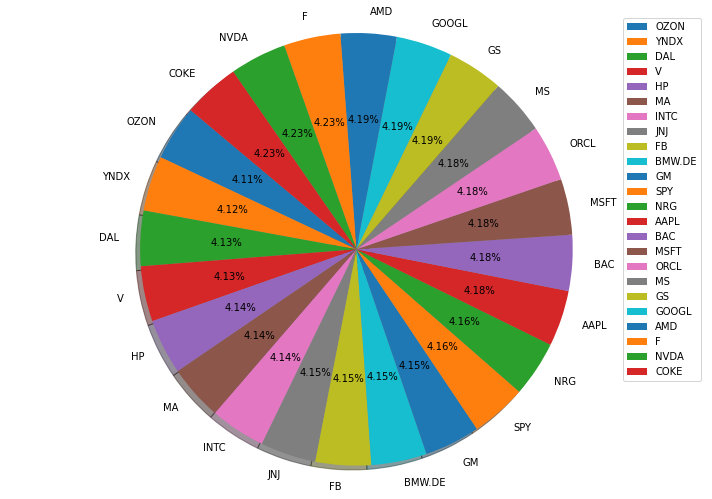

In [10]:
plt.figure(figsize=(10, 7))
plt.pie(portfolio['Values'].values, labels=portfolio['Name'].values, normalize=True, autopct='%.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend(portfolio['Name'].values, loc="best")
plt.tight_layout()
plt.show()

In [11]:
money = 10000
print('Name\t|Need to spend')
print('-'*8+'+'+'-'*len('Need to spend'))
for i in range(len(portfolio)):
    print(portfolio.loc[i, 'Name'],'\t|','{:.2f}$'.format(portfolio.loc[i, 'Values']*money))
    print('-'*8+'+'+'-'*len('Need to spend'))

Name	|Need to spend
--------+-------------
OZON 	| 411.32$
--------+-------------
YNDX 	| 412.42$
--------+-------------
DAL 	| 412.73$
--------+-------------
V 	| 413.44$
--------+-------------
HP 	| 413.66$
--------+-------------
MA 	| 413.67$
--------+-------------
INTC 	| 414.15$
--------+-------------
JNJ 	| 414.85$
--------+-------------
FB 	| 414.97$
--------+-------------
BMW.DE 	| 415.16$
--------+-------------
GM 	| 415.26$
--------+-------------
SPY 	| 415.86$
--------+-------------
NRG 	| 416.10$
--------+-------------
AAPL 	| 417.58$
--------+-------------
BAC 	| 417.92$
--------+-------------
MSFT 	| 418.00$
--------+-------------
ORCL 	| 418.06$
--------+-------------
MS 	| 418.19$
--------+-------------
GS 	| 418.72$
--------+-------------
GOOGL 	| 418.72$
--------+-------------
AMD 	| 418.86$
--------+-------------
F 	| 423.44$
--------+-------------
NVDA 	| 423.44$
--------+-------------
COKE 	| 423.47$
--------+-------------
